# Time Series Fundamentals

In [ ]:
#Import dependencies
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get bitcoin historical data
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-01-10 17:35:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2024-01-10 17:35:43 (6.87 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
# read in Bitcoin data and parse the dates
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
               parse_dates=["Date"],
               index_col=["Date"])

In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
# Only want closing price for each day
bitcoin_prices=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})

<Axes: xlabel='Date'>

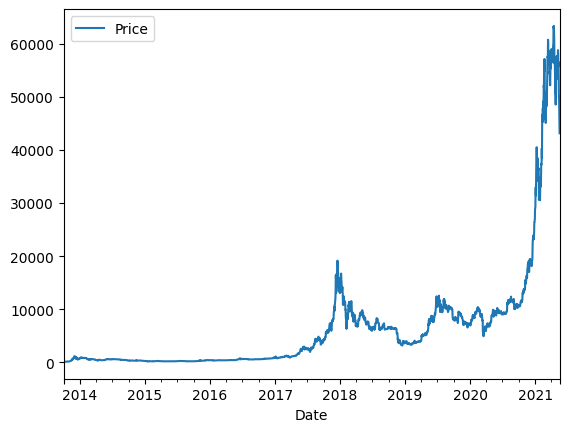

In [ ]:
bitcoin_prices.plot(kind="line")

##Importing time sries data with python csv module

In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps=[]
btc_price=[]
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader=csv.reader(f, delimiter=",")
  next(csv_reader)                 # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

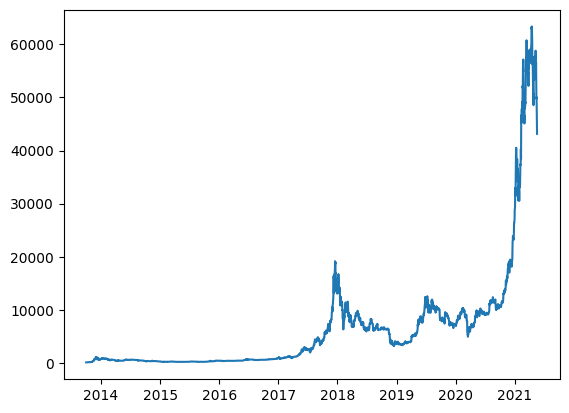

In [ ]:
plt.plot(timesteps, btc_price)

## Create train and test data

In [ ]:
timesteps=bitcoin_prices.index.to_numpy() # Get bitcoin date array
prices=bitcoin_prices["Price"].to_numpy()
timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(timesteps, prices, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

In [ ]:
# Create train and test splits the right way for time series data
split_size=int(0.8*len(prices))  # 80% train, 20% test

# Create train data splits
X_train, y_train=timesteps[:split_size], prices[:split_size]

# Create test data splits
X_test, y_test=timesteps[split_size:], prices[split_size:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2229,), (2229,), (558,), (558,))

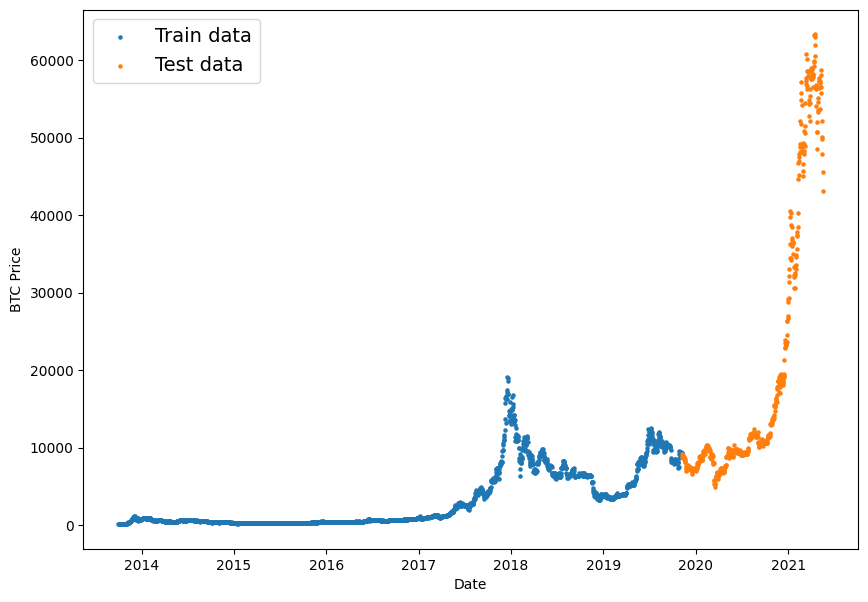

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


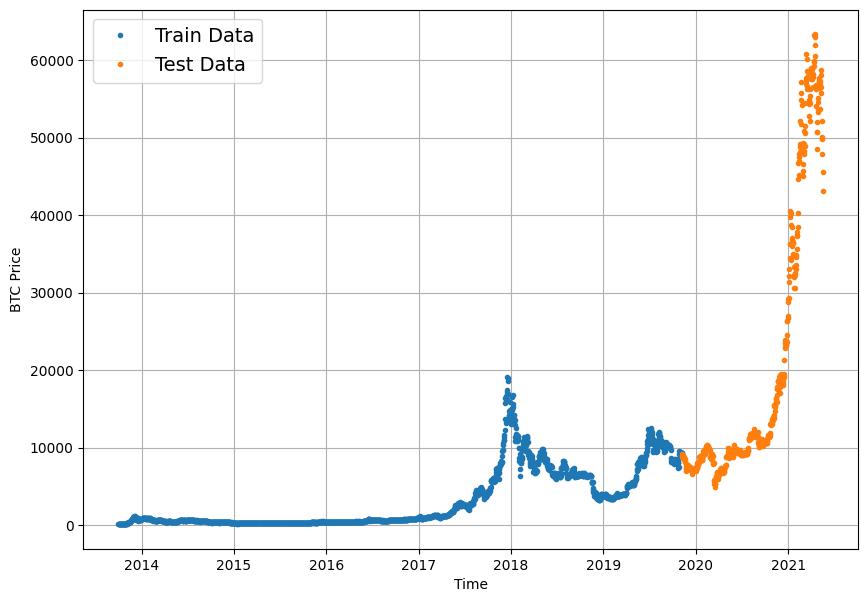

In [ ]:
  # Test out plotting function
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_train, values=y_train, label="Train Data")
plot_time_series(timesteps=X_test, values=y_test, label="Test Data")

## Modeling Experiments

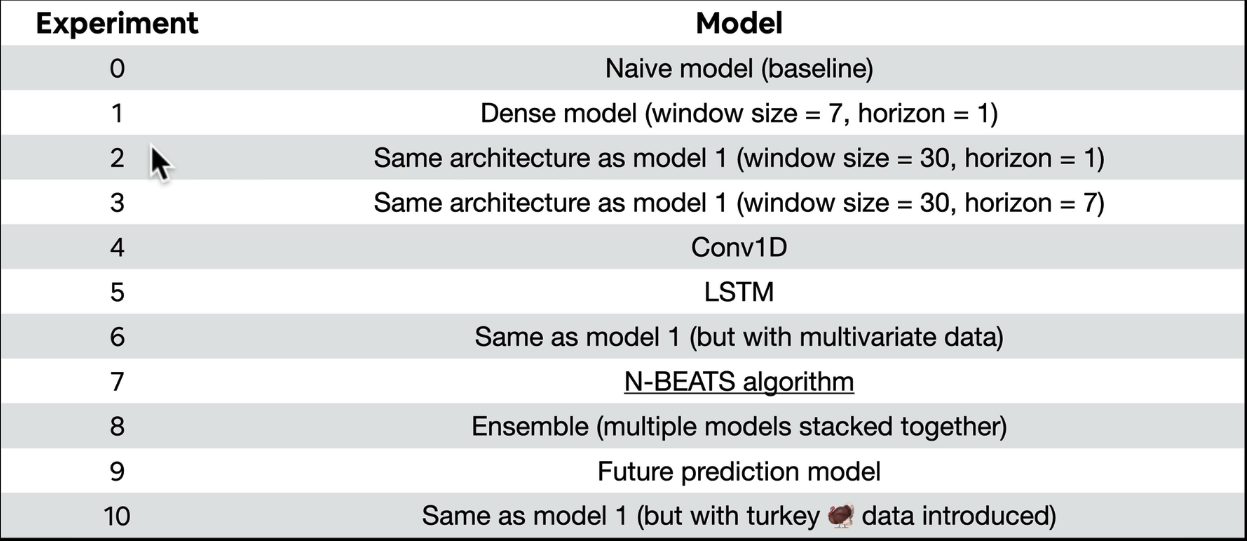



## Model 0: Naive Forecast Baseline

In [ ]:
# Create a naive forecast
naive_forecast=y_test[:-1]

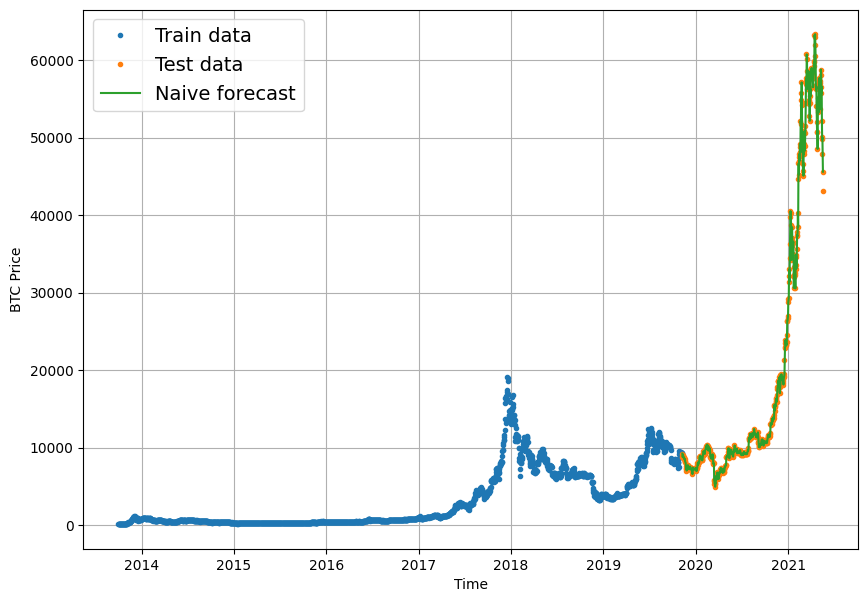

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.


We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error


In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season



In [ ]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
#get baseline mase
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
#get all naive_results
naive_results=evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Formatting data for deep learning models

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

Windowing for one week


```
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```




In [ ]:
btc_price[:7], btc_price[7]

([123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795],
 123.033)

In [ ]:
# setup global variables for window and horizon size
HORIZON= 1
WINDOW_SIZE= 7

In [ ]:
# Create function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label=get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

## Sliding window approach

To speed things up, we'll leverage NumPy's array indexing - https://numpy.org/doc/stable/reference/arrays.indexing.html.

Our function will:

1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:


```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```




3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon




In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
  window_step=np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes=window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array=x[window_indexes]

  # 4. Get the labelled windows
  windows, labels=get_labelled_window(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"window: {full_windows[i-3]} -> {full_labels[i-3]}")

window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> [47885.62525472]
window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> [45604.61575361]
window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> [43144.47129086]


## Turning windows into training and test sets


In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size=int(len(windows)*(1-test_split)) # this will default to 80% train/20% test
  train_windows= windows[:split_size]
  train_labels=labels[:split_size]

  test_windows=windows[split_size:]
  test_labels=labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels=make_train_test_splits(full_windows, full_labels)

len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

## Make a modeling checkpoint callback

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense Model

In [ ]:
tf.random.set_seed(42) # Set random seed for as reproducible results as possible

# 1. Construct model
model_1=tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Dense(128, activation="relu"))
model_1.add(tf.keras.layers.Dense(1, activation="linear"))

# 2. Compile
model_1.compile(loss="mae", optimizer="adam", metrics=["mae", "mse"])


In [ ]:
# 3. Fit the model
model_1.fit(x=train_windows, y=train_labels, batch_size=128, epochs=100, validation_data=(test_windows, test_labels), callbacks=create_model_checkpoint("Model_1"))

Epoch 1/100
18/18 [==============================] - 6s 123ms/step - loss: 912.7349 - mae: 912.7349 - mse: 3130345.7500 - val_loss: 2486.1780 - val_mae: 2486.1780 - val_mse: 15539447.0000
Epoch 2/100
18/18 [==============================] - 1s 50ms/step - loss: 280.1416 - mae: 280.1416 - mse: 361377.0625 - val_loss: 1043.0059 - val_mae: 1043.0059 - val_mse: 3649576.7500
Epoch 3/100
18/18 [==============================] - 1s 80ms/step - loss: 197.4707 - mae: 197.4707 - mse: 190773.3594 - val_loss: 1012.3253 - val_mae: 1012.3253 - val_mse: 3417859.2500
Epoch 4/100
18/18 [==============================] - 1s 49ms/step - loss: 184.7821 - mae: 184.7821 - mse: 179350.4844 - val_loss: 990.4746 - val_mae: 990.4746 - val_mse: 3231673.5000
Epoch 5/100
18/18 [==============================] - 0s 26ms/step - loss: 177.2702 - mae: 177.2702 - mse: 167999.8281 - val_loss: 961.8557 - val_mae: 961.8557 - val_mse: 3055398.2500
Epoch 6/100
18/18 [==============================] - 0s 27ms/step - loss: 17

In [ ]:
# Evaluate model on test data using best weights
model_1=tf.keras.models.load_model("/content/model_experiments/Model_1")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 567.0017 - mae: 567.0017 - mse: 1164159.3750


[567.001708984375, 567.001708984375, 1164159.375]

In [ ]:
# function that uses model to make predictions on input_data.
def make_preds(model, input_data):
  forecast=model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds=make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8839.838, 8763.478, 9032.284, 8760.73 , 8739.912, 8755.638,
        8661.236, 8511.288, 8457.473, 8521.068], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results=evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 567.0017,
 'mse': 1164159.4,
 'rmse': 1078.9622,
 'mape': 2.5465858,
 'mase': 0.99606496}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

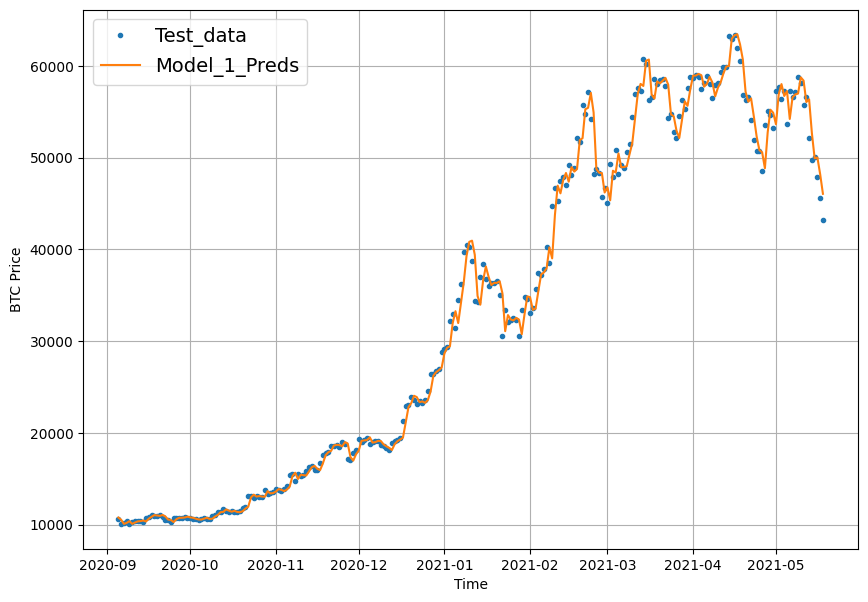

In [ ]:
# Let's plot model 1 predictions
offset=300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="Model_1_Preds")

## Model 2: Dense with window=30, horizon=1

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows_30, full_labels_30 = make_windows(prices, window_size=30, horizon=1)
len(full_windows_30), len(full_labels_30)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels=make_train_test_splits(full_windows_30, full_labels_30)

len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2205, 2205, 552, 552)

In [ ]:
tf.random.set_seed(42)

# Create model
model_2=tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Dense(128, activation="relu"))
model_2.add(tf.keras.layers.Dense(1, activation="linear"))

# Compile
model_2.compile(loss="mae", optimizer="adam", metrics=["mae", "mse"])

# Fit
model_2.fit(x=train_windows, y=train_labels, batch_size=128, epochs=100, validation_data=(test_windows, test_labels), callbacks=create_model_checkpoint("Model_2"))

Epoch 1/100
18/18 [==============================] - 2s 36ms/step - loss: 1025.5558 - mae: 1025.5558 - mse: 4279308.5000 - val_loss: 4003.9424 - val_mae: 4003.9424 - val_mse: 33274398.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 374.6027 - mae: 374.6027 - mse: 615268.3125 - val_loss: 1450.6520 - val_mae: 1450.6520 - val_mse: 6506038.5000
Epoch 3/100
18/18 [==============================] - 0s 26ms/step - loss: 266.6798 - mae: 266.6798 - mse: 338484.0625 - val_loss: 1241.5632 - val_mae: 1241.5632 - val_mse: 4908046.0000
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 228.6590 - mae: 228.6590 - mse: 256339.9062 - val_loss: 1236.1038 - val_mae: 1236.1038 - val_mse: 4870443.5000
Epoch 5/100
18/18 [==============================] - 0s 26ms/step - loss: 215.4233 - mae: 215.4233 - mse: 218106.4844 - val_loss: 1133.4180 - val_mae: 1133.4180 - val_mse: 4229550.5000
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss

In [ ]:
# Evaluate model 2 on test data using best weights
model_2=tf.keras.models.load_model("/content/model_experiments/Model_2")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 622.1228 - mae: 622.1228 - mse: 1302619.2500


[622.122802734375, 622.122802734375, 1302619.25]

In [ ]:
model_2_preds=make_preds(model_2, test_windows) # Get forecast predictions
len(model_2_preds), model_2_preds[:10]

18/18 [==============================] - 0s 2ms/step


(552,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8817.403 , 8940.651 , 8782.284 , 8602.386 , 8457.115 , 8314.052 ,
        8124.6724, 8206.153 , 8289.744 , 7776.7495], dtype=float32)>)

In [ ]:
# Evaluate results for model 2 predictions
model_2_results=evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'mae': 622.12286,
 'mse': 1302619.1,
 'rmse': 1141.3234,
 'mape': 2.8695989,
 'mase': 1.0874768}

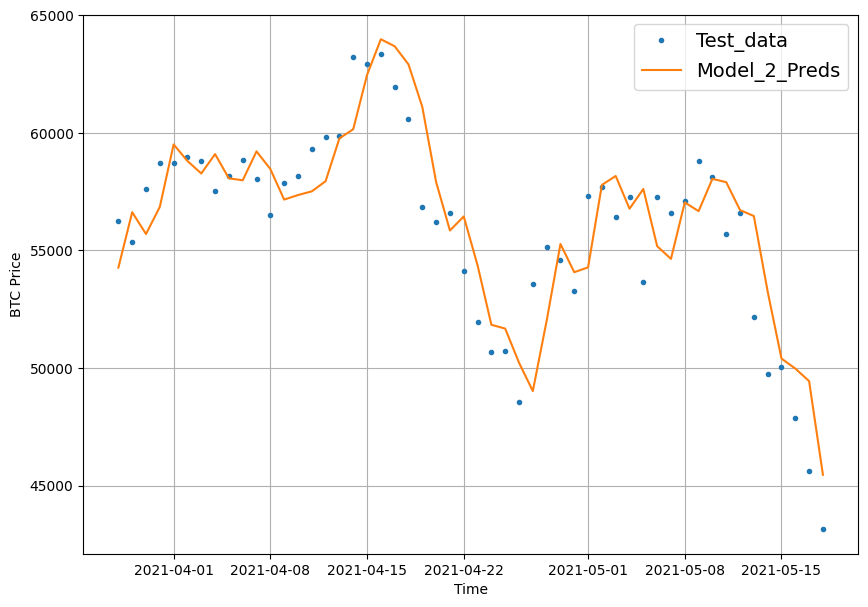

In [ ]:
#plot model_2 predictions
offset=500
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="Model_2_Preds")

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

## Model 3: Horizon=7, window=30

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(HORIZON)
], name="model_3_dense")

# Compile
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3.evaluate(test_windows, test_labels) # Evaluate the model on the test data

18/18 [==============================] - 0s 2ms/step - loss: 1365.0762


1365.076171875

In [ ]:
# load in best model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1230.6084


1230.6083984375

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9185.289, 9446.893, 9395.531, 9377.467, 9526.983, 9468.576,
        9671.656],
       [8852.073, 9155.678, 9170.876, 9131.01 , 9261.094, 9205.408,
        9393.927],
       [8698.191, 8927.515, 9027.646, 8974.26 , 9023.342, 9125.267,
        9282.449],
       [8957.602, 9036.272, 9219.675, 9176.678, 9100.582, 9308.865,
        9339.693],
       [8865.246, 9000.587, 8950.176, 9109.238, 9036.659, 9244.214,
        9098.19 ]], dtype=float32)>

In [ ]:
model_3_results=evaluate_preds(tf.squeeze(test_labels), model_3_preds) # Get model_3 results aggregated to single values
model_3_results

{'mae': 1230.6084,
 'mse': 5399673.5,
 'rmse': 1416.1665,
 'mape': 5.580715,
 'mase': 2.1897988}

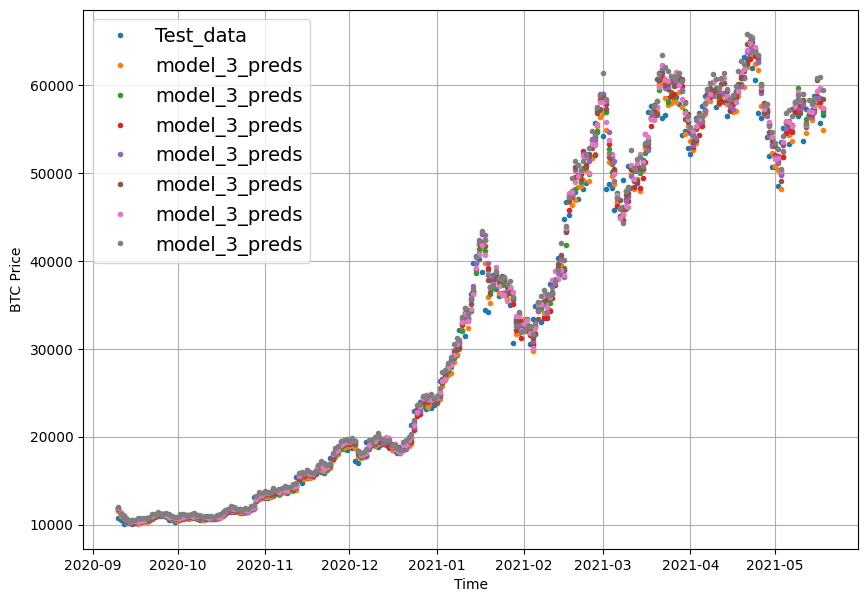

In [ ]:
# Evaluate model_3 results
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

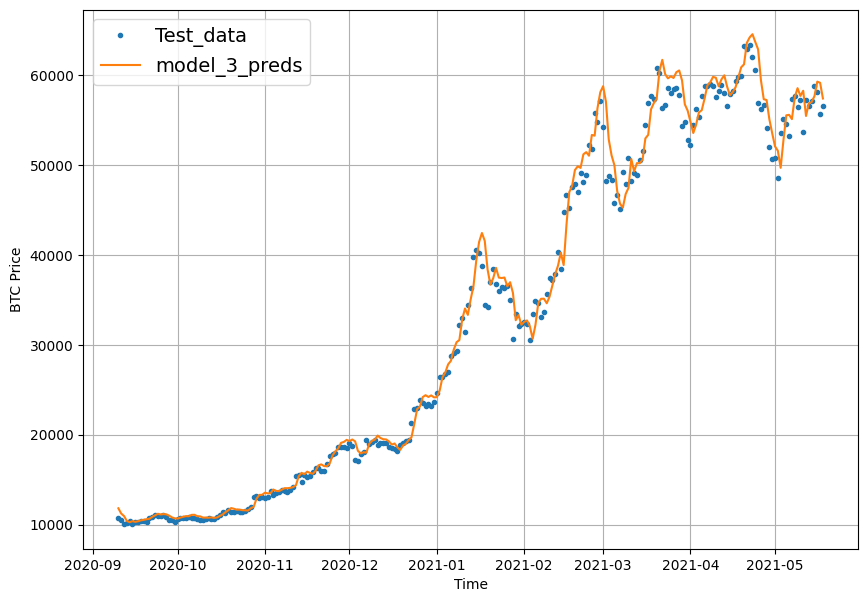

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

## Which model is performing the best so far? (lower the better)

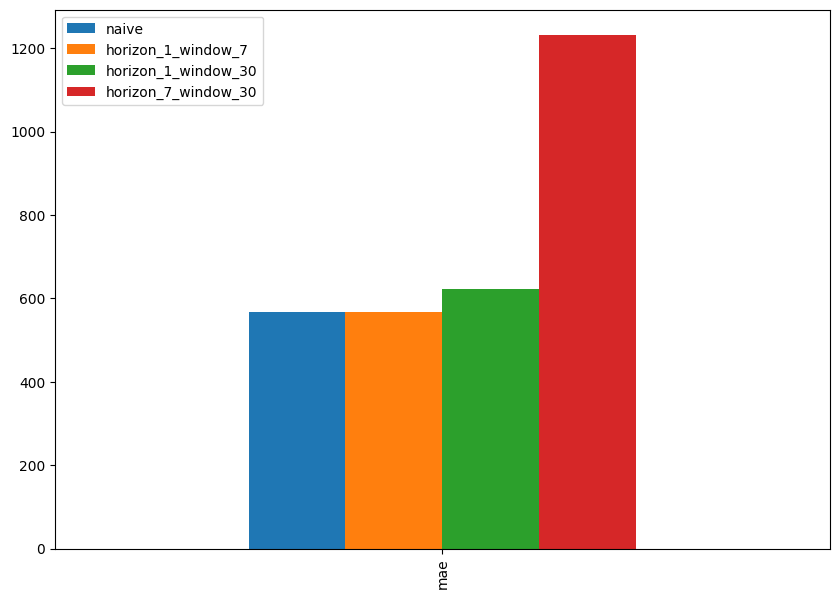

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

## Model 4: Conv1D


In [ ]:
HORIZON=1
WINDOW_SIZE=7

# Create windowed data
full_windows, full_labels=make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
x=tf.constant(train_windows[0]) # Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer=tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [ ]:
# Test out the lambda layer
expand_dims_layer(x)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

In [ ]:
tf.random.set_seed(42)

# Create Conv1D model
model_4=tf.keras.Sequential()
model_4.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)))
model_4.add(tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"))
model_4.add(tf.keras.layers.Dense(HORIZON, activation="linear"))

# Compile model
model_4.compile(loss="mae", optimizer="adam", metrics=["mae", "mse"])

In [ ]:
# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name="Model_4")])

In [ ]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 595.8701 - mae: 595.8701 - mse: 1223856.8750


[595.8701171875, 595.8701171875, 1223856.875]

In [ ]:
# Load back in best performing Conv1D and re-evaluate
model_4=tf.keras.models.load_model("/content/model_experiments/Model_4")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 573.4252 - mae: 573.4252 - mse: 1192248.2500


[573.4252319335938, 573.4252319335938, 1192248.25]

In [ ]:
model_4_preds = make_preds(model_4,
                           input_data=test_windows)
model_4_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8923.898, 8821.066, 9015.965, 8802.954, 8771.289], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results=evaluate_preds(tf.squeeze(test_labels), model_4_preds)
model_4_results

{'mae': 573.42523,
 'mse': 1192248.2,
 'rmse': 1091.9012,
 'mape': 2.5729733,
 'mase': 1.0073493}

## Model 5: LSTM

In [ ]:
tf.random.set_seed(42)

# build an LSTM mode
model_5=tf.keras.Sequential()
model_5.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)))
#model_5.add(tf.keras.layers.LSTM(128, return_sequences=True))
model_5.add(tf.keras.layers.LSTM(128, activation="relu"))
#model_5.add(tf.keras.layers.Dense(32, activation="relu"))
model_5.add(tf.keras.layers.Dense(HORIZON, activation="linear"))

# Compile
model_5.compile(loss="mae", optimizer="adam", metrics=["mae", "mse"])

In [ ]:
# Fit
model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name="Model_5")])

Epoch 1/100
18/18 [==============================] - 4s 150ms/step - loss: 2922.1375 - mae: 2922.1375 - mse: 20730078.0000 - val_loss: 15913.8799 - val_mae: 15913.8799 - val_mse: 446360896.0000
Epoch 2/100
18/18 [==============================] - 2s 94ms/step - loss: 1698.1418 - mae: 1698.1418 - mse: 7618104.5000 - val_loss: 4835.4927 - val_mae: 4835.4927 - val_mse: 42824792.0000
Epoch 3/100
18/18 [==============================] - 2s 109ms/step - loss: 353.2842 - mae: 353.2842 - mse: 501281.1562 - val_loss: 1219.1750 - val_mae: 1219.1750 - val_mse: 4639498.0000
Epoch 4/100
18/18 [==============================] - 1s 84ms/step - loss: 192.0015 - mae: 192.0015 - mse: 180783.9375 - val_loss: 980.4009 - val_mae: 980.4009 - val_mse: 3084840.0000
Epoch 5/100
18/18 [==============================] - 1s 84ms/step - loss: 168.6001 - mae: 168.6001 - mse: 151089.7344 - val_loss: 914.5804 - val_mae: 914.5805 - val_mse: 2596341.7500
Epoch 6/100
18/18 [==============================] - 1s 87ms/step

In [ ]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 594.2432 - mae: 594.2432 - mse: 1255230.0000


[594.2431640625, 594.2431640625, 1255230.0]

In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5=tf.keras.models.load_model("/content/model_experiments/Model_5")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 593.7501 - mae: 593.7501 - mse: 1254510.6250


[593.7500610351562, 593.7500610351562, 1254510.625]

In [ ]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5,
                           input_data=test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8975.7  , 8849.174, 8980.659, 8806.369, 8780.195], dtype=float32)>

In [ ]:
# Evaluate model 5 predictions
model_5_results=evaluate_preds(tf.squeeze(test_labels), model_5_preds)
model_5_results

{'mae': 593.75,
 'mse': 1254510.8,
 'rmse': 1120.0494,
 'mape': 2.686843,
 'mase': 1.0430543}

## Make a multivariate Dataset

In [ ]:
# add the bitcoin halving events to the dataset
block_reward_1=50 # 3 January 2009
block_reward_2=25 # 8 November 2012
block_reward_3=12.5 # 9 July 2016
block_reward_4=6.25  # 18 May 2020

# Block reward dates
block_reward_2_datetime=np.datetime64("2012-11-28")
block_reward_3_datetime=np.datetime64("2016-07-09")
block_reward_4_datetime=np.datetime64("2020-05-18")


In [ ]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days=(block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days=(block_reward_4_datetime-bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# Add in a block_reward column
bitcoin_prices_block=bitcoin_prices.copy()
bitcoin_prices_block["block_reward"]=None

# Add in block_reward values as a feature to the dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1]=block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1]=block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1]=block_reward_4


In [ ]:
bitcoin_prices_block

,Price,block_reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25


<Axes: xlabel='Date'>

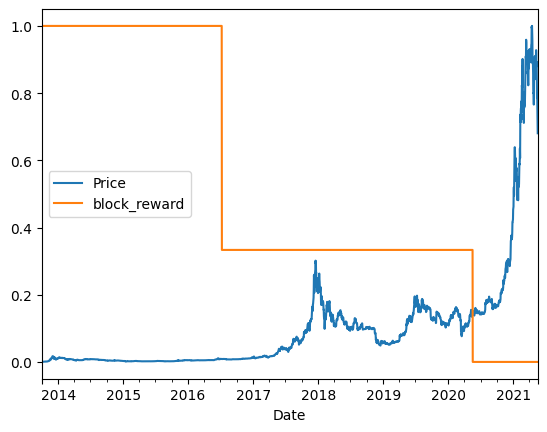

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), columns=bitcoin_prices_block.columns, index=bitcoin_prices_block.index)
scaled_price_block_df.plot()

In [ ]:
# Setup dataset hyperparameters
HORIZON=1
WINDOW_SIZE=7

# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed=bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"]= bitcoin_prices_windowed["Price"].shift(periods=i+1) # shift values for each step in WINDOW_SIZE

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# Create X (windows) and y (horizons) features
X=bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y=bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head(5), y.head(5)

(            block_reward     Price+1     Price+2     Price+3     Price+4  \
 Date                                                                       
 2013-10-08          25.0  121.794998  120.655327  121.338661  118.674660   
 2013-10-09          25.0  123.032997  121.794998  120.655327  121.338661   
 2013-10-10          25.0  124.049004  123.032997  121.794998  120.655327   
 2013-10-11          25.0  125.961159  124.049004  123.032997  121.794998   
 2013-10-12          25.0  125.279663  125.961159  124.049004  123.032997   
 
                Price+5     Price+6     Price+7  
 Date                                            
 2013-10-08  108.584831  125.455002  123.654991  
 2013-10-09  118.674660  108.584831  125.455002  
 2013-10-10  121.338661  118.674660  108.584831  
 2013-10-11  120.655327  121.338661  118.674660  
 2013-10-12  121.794998  120.655327  121.338661  ,
 Date
 2013-10-08    123.032997
 2013-10-09    124.049004
 2013-10-10    125.961159
 2013-10-11    125.27966

In [ ]:
# Make train and test sets using indexing
split_size= int(len(X)*0.8)
X_train, y_train=X[:split_size], y[:split_size]
X_test, y_test=X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

##Model 6: Multivariate model

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6=tf.keras.models.Sequential()
model_6.add(tf.keras.layers.Dense(128, activation="relu"))
model_6.add(tf.keras.layers.Dense(1, activation="linear"))

# Compile
model_6.compile(loss="mae", optimizer="adam", metrics=["mae", "mse"])

# Fit
model_6.fit(X_train,
            y_train,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name="Model_6")])

Epoch 1/100
18/18 [==============================] - 2s 35ms/step - loss: 996.1314 - mae: 996.1314 - mse: 3732176.0000 - val_loss: 2901.9192 - val_mae: 2901.9192 - val_mse: 19970742.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 303.6360 - mae: 303.6360 - mse: 412227.6250 - val_loss: 1177.7716 - val_mae: 1177.7716 - val_mse: 4570386.5000
Epoch 3/100
18/18 [==============================] - 0s 27ms/step - loss: 211.9188 - mae: 211.9188 - mse: 214081.5469 - val_loss: 1057.8976 - val_mae: 1057.8976 - val_mse: 3778642.5000
Epoch 4/100
18/18 [==============================] - 0s 25ms/step - loss: 195.5123 - mae: 195.5123 - mse: 193768.1094 - val_loss: 1011.7778 - val_mae: 1011.7778 - val_mse: 3401101.7500
Epoch 5/100
18/18 [==============================] - 0s 26ms/step - loss: 191.4892 - mae: 191.4892 - mse: 188386.0625 - val_loss: 1011.6829 - val_mae: 1011.6829 - val_mse: 3258256.2500
Epoch 6/100
18/18 [==============================] - 0s 27ms/step - loss:

In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 736.1956 - mae: 736.1956 - mse: 1558708.1250


[736.195556640625, 736.195556640625, 1558708.125]

In [ ]:
# Load in and evaluate best performing model
model_6=tf.keras.models.load_model("/content/model_experiments/Model_6")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 565.4280 - mae: 565.4280 - mse: 1155869.8750


[565.427978515625, 565.427978515625, 1155869.875]

In [ ]:
# Make predictions with multivariate model
model_6_preds=make_preds(model_6, X_test)

# Evaluate predictions to get eval metrics
model_6_results=evaluate_preds(tf.squeeze(y_test), model_6_preds)
model_6_results

18/18 [==============================] - 0s 2ms/step


{'mae': 565.42804,
 'mse': 1155870.0,
 'rmse': 1075.1139,
 'mape': 2.5470972,
 'mase': 0.99330044}

## Model 7: N-Beats Model

we're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

Why?

* This will allow us to practice replicating a paper with TensorFlow code
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of the art results on our problem

Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow we can use subclassing: https://www.tensorflow.org/guide/keras/custom_layers_and_models



In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:

backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 1.48072743e+00  5.36764026e-01 -1.35905892e-01 -1.02852285e-03
  3.64048868e-01 -3.26553524e-01  1.09668136e-01]
Forecast: -0.007784545421600342


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# make the dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
# Values from N-BEATS paper
N_EPOCHS=5000
N_NEURONS= 512
N_LAYERS= 4
N_STACKS=30

INPUT_SIZE=WINDOW_SIZE*HORIZON
THETA_SIZE= INPUT_SIZE+HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## Getting ready for residual connections

Before building the N-BEATS model, we need two layers for the residual connections (subtract and add).

In [ ]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = tf.keras.layers.subtract([tensor_1, tensor_2])

# Add
added = tf.keras.layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:
from tensorflow.keras import layers

In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 211: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 311: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 47s, sys: 2.71 s, total: 1min 49s
Wall time: 2min 2s


In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 24ms/step - loss: 585.3571 - mae: 585.3571 - mse: 1205080.8750


[585.3570556640625, 585.3570556640625, 1205080.875]

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8947.827 , 8833.157 , 8993.032 , 8822.257 , 8791.211 , 8752.9375,
       8694.45  , 8560.076 , 8502.9375, 8526.071 ], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 585.35706,
 'mse': 1205080.9,
 'rmse': 1097.7617,
 'mape': 2.6790102,
 'mase': 1.0283102}

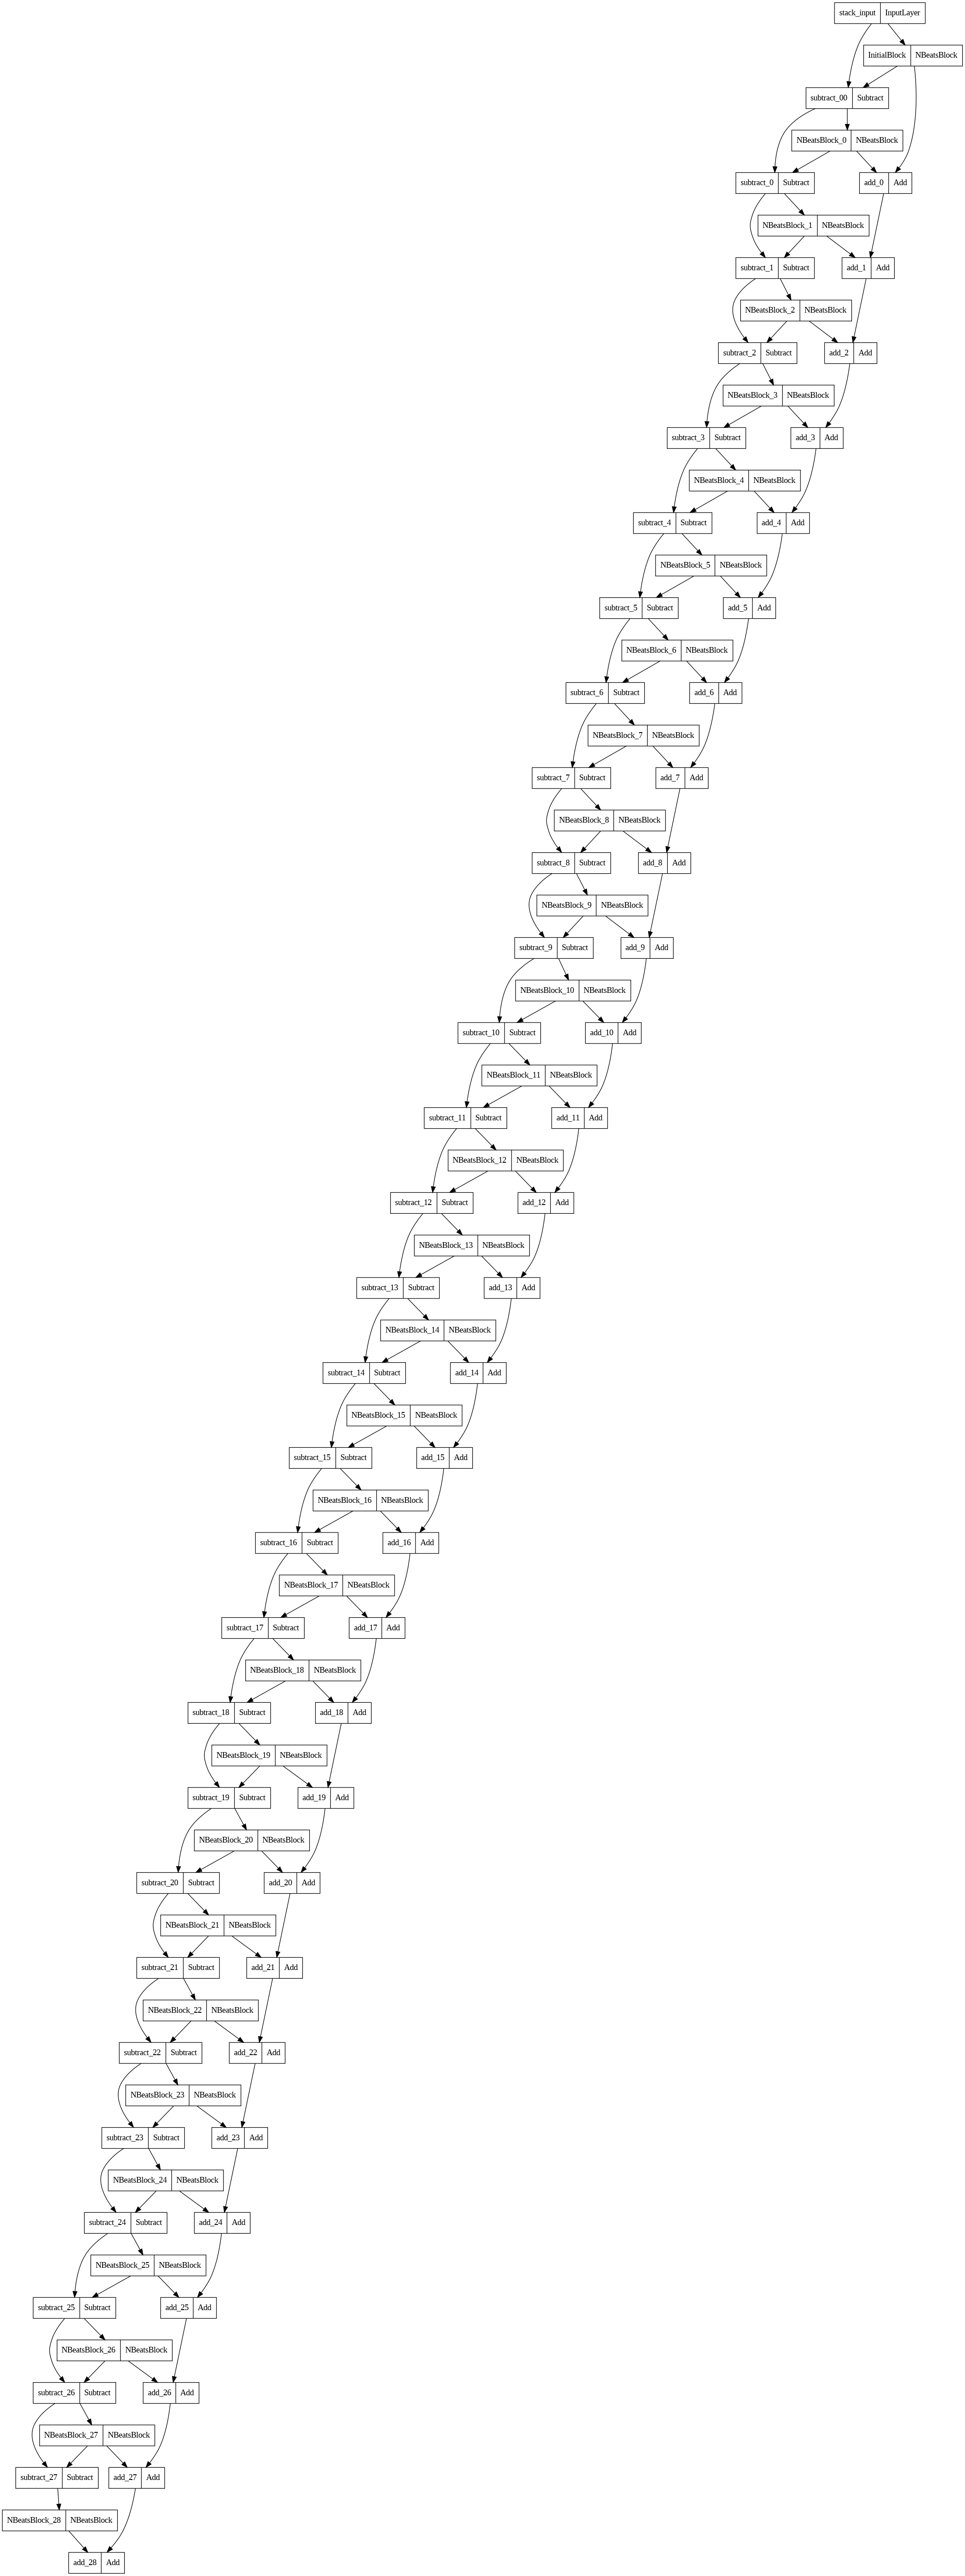

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7) #plotting the NBEATS model

## Model 8: Ensemble model

An ensemble involves training and combining multiple different models on the same problem.

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([

        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction

        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [ ]:
%%time

#get list of trained ensemble models

ensemble_models= get_ensemble_models(num_iter=5, num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 440: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 540: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 199: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 299: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 676: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 776: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 298: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 533: ReduceLROnPlateau reduci

In [ ]:
len(ensemble_models)

15

## make predictions using ensemble model

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

In [ ]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 568.143,
 'mse': 1139681.4,
 'rmse': 1067.5586,
 'mape': 2.5749514,
 'mase': 0.9980699}

## Plotting the prediction intervals (uncertainty estimates) of our ensemble

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

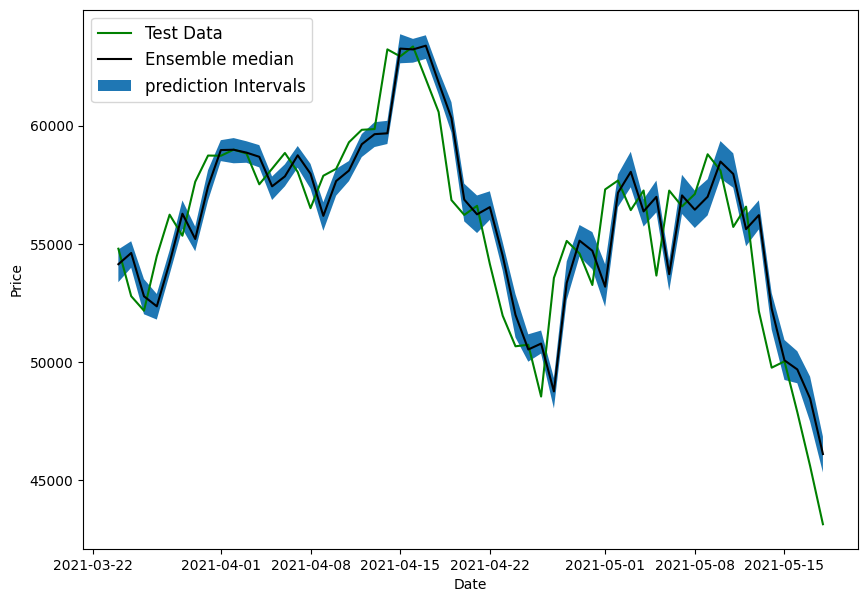

In [ ]:
# get the median/mean values of our ensemble preds
ensemble_median=np.median(ensemble_preds, axis=0)

#plot the median with intervals (upper & lower)

offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g-", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble median")
plt.xlabel("Date")
plt.ylabel("Price")
# use fill_between to plot uper and lower bounds
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="prediction Intervals")
plt.legend(loc="upper left", fontsize=12)

## Model 9: Model to make predictions into the future

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

Next, create a function which returns INTO_FUTURE forecasted values using a trained model.

To do so:

1. Function which takes as input:

    * a list of values (the Bitcoin historical data)
    * a trained model (such as model_9)
    * a window into the future to predict (our INTO_FUTURE variable) the window size a model was trained on (WINDOW_SIZE) - the model can only predict on the same kind of data it was trained on

2. Creates an empty list for future forecasts (this will be returned at the end of the function) and extracts the last WINDOW_SIZE values from the input values (predictions will start from the last WINDOW_SIZE values of the training data)
3. Loop INTO_FUTURE times making a prediction on WINDOW_SIZE datasets which update to remove the first the value and append the latest prediction

    * Eventually future predictions will be made using the model's own previous predictions as input


In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
# Make forecasts into future of the price of Bitcoin
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 108ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 54992.5

1/1 [==============================] - 0s 37ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 54992.5       ] -> Prediction: 51794.765625

1/1 [==============================] - 0s 27ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 54992.5        51794.765625  ] -> Prediction: 47876.2890625

1/1 [==============================] - 0s 32ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 54992.5        51794.765625   47876.2890625 ] -> Prediction: 48758.9921875

1/1 [==============================] - 0s 40ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 54992.5
 51794.765625   47876.2890625  48758.9921875 ] -> Predi

###Plot future forecasts

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [ ]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 54992.5  , 51794.766, 47876.29 , 48758.992, 46704.086,
        46444.75 , 46629.613, 53384.164, 50650.168, 46822.57 , 47845.586,
        46744.535, 47422.27 , 48486.375], dtype=float32))

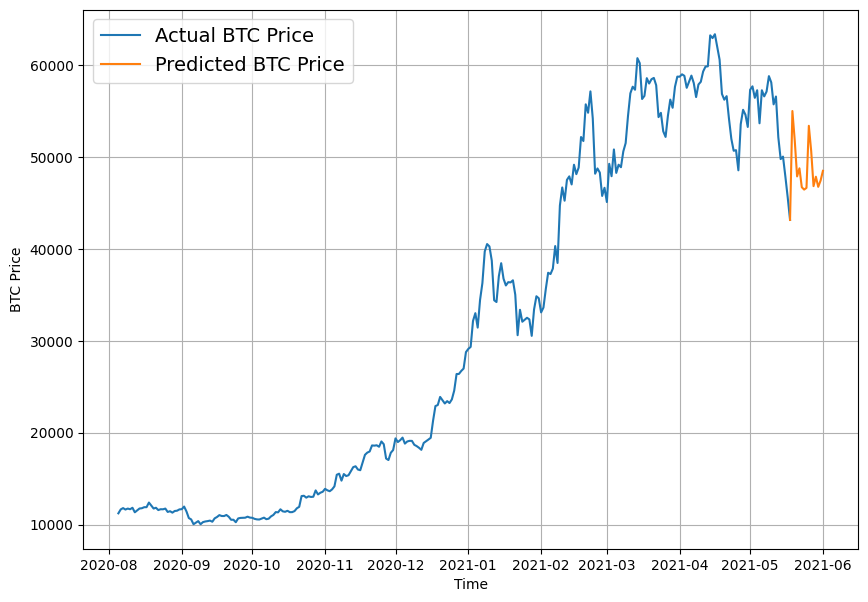

In [ ]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")